In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
#%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from extract_uses import mapzen
import graph.graph as graph
import networkx as nx

citiesFolder = 'cities/'
city_ref = 'grenoble_france'
#city_ref = 'avila_spain'

In [3]:
# Create the graph representing the road network of the city
graph.spatialite_network(citiesFolder, city_ref)

('Downloaded osm pbf:', 'https://s3.amazonaws.com/metro-extracts.mapzen.com/grenoble_france.osm.pbf')
Spatialite: OSM processed
('cities/grenoble_france', 'cities/grenoble_france.sqlite')
ogr2ogr: SQLite to Shapefile done


In [4]:
g = graph.load_graph(citiesFolder + city_ref)

In [5]:
# Get closest nodes
nodeOfInterest1 = (5.732105 , 45.188835) # Place verdun
nodeOfInterest2 = (5.740238, 45.187474) # Stade des alpes 
print('Nodes: Place Verdun, Stade des alpes')

closest_node1 = graph.get_closest_node(nodeOfInterest1, g)
print(closest_node1)

closest_node2 = graph.get_closest_node(nodeOfInterest2, g)
print(closest_node2)

Nodes: Place Verdun, Stade des alpes
('Distance to closest node in Km: ', 0.050701569976650825)
(5948, {'cardinality': 3, 'pos': (5.7324923, 45.1884694)})
('Distance to closest node in Km: ', 0.12541345463606438)
(6472, {'cardinality': 3, 'pos': (5.7400939, 45.188598)})


In [6]:
cost = nx.shortest_path_length(g, closest_node1[0], closest_node2[0], 'cost')
length = nx.shortest_path_length(g, closest_node1[0], closest_node2[0], 'length')
print( "Cost, Length: ", cost ,  length)

shortest_path = nx.shortest_path(g, closest_node1[0], closest_node2[0], 'cost')
path_edges = zip(shortest_path,shortest_path[1:])

('Cost, Length: ', 58.452380732344416, 643.4998019023509)


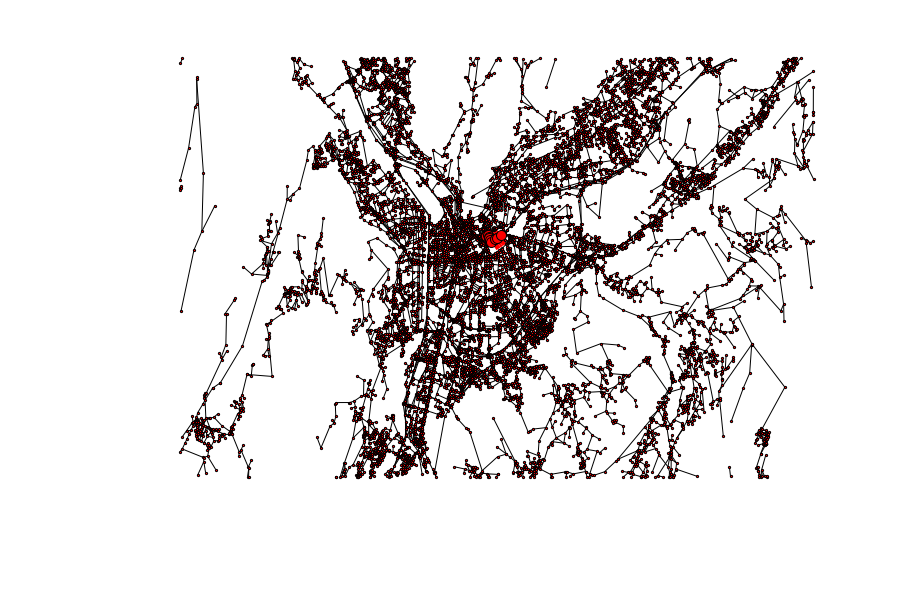

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
plt.figure(figsize=(12,8))
pos = {idx:(longitude,latitude) for (idx, (longitude,latitude)) in nx.get_node_attributes(g, 'pos').items()}
nx.draw(g, pos, with_labels=False, node_size=5)
# Shortest path
nx.draw_networkx_nodes(g,pos,nodelist=shortest_path, node_size=100, node_color='r')
nx.draw_networkx_edges(g,pos,edgelist=path_edges, width=20, edge_color='r')
#plt.axis('equal')

plt.show()